<a href="https://colab.research.google.com/github/zeynepmerve97/Machine_Learning_Algorithms/blob/main/cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np
import keras

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D,BatchNormalization
from keras import backend as K
import os
import pandas as pd
import cv2

In [ ]:
from sklearn.datasets import load_breast_cancer,load_sample_images

In [ ]:
from keras.datasets import fashion_mnist
(train_X,train_Y), (test_X,test_Y) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
import tensorflow as tf
#y_train= tf.keras.utils.to_categorical(y_train, num_classes= 10)
#y_test = tf.keras.utils.to_categorical(y_test,num_classes= 10)


import numpy as np
import tensorflow as tf

import matplotlib.pyplot as plt
%matplotlib inline

print('Training data shape : ', train_X.shape, train_Y.shape)

print('Testing data shape : ', test_X.shape, test_Y.shape)

Training data shape :  (60000, 28, 28) (60000,)
Testing data shape :  (10000, 28, 28) (10000,)


In [ ]:
classes = np.unique(train_Y)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


Text(0.5, 1.0, 'Ground Truth : 9')

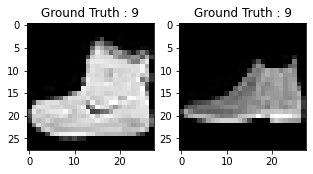

In [ ]:
plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
plt.imshow(train_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_Y[0]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_Y[0]))

In [ ]:
train_X = train_X.reshape(-1, 28,28, 1)
test_X = test_X.reshape(-1, 28,28, 1)
train_X.shape, test_X.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [ ]:
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X / 255.
test_X = test_X / 255.

In [ ]:
train_Y_one_hot = tf.keras.utils.to_categorical(train_Y)
test_Y_one_hot = tf.keras.utils.to_categorical(test_Y)

# Display the change for category label using one-hot encoding
print('Original label:', train_Y[0])
print('After conversion to one-hot:', train_Y_one_hot[0])

Original label: 9
After conversion to one-hot: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [ ]:
train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.2, random_state=13)

In [ ]:
train_X.shape,valid_X.shape,train_label.shape,valid_label.shape

((48000, 28, 28, 1), (12000, 28, 28, 1), (48000, 10), (12000, 10))

In [ ]:
model4 = Sequential()
model4.add(Conv2D(32, kernel_size = (5,5),padding = 'Same',strides=(2, 2),
                 activation ='relu', input_shape = (28,28,1)))

model4.add(Conv2D(64, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model4.add(MaxPooling2D(5,5,padding='same'))
model4.add(Dropout(0.25))

model4.add(Conv2D(128, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model4.add(Conv2D(256, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))

model4.add(Dropout(0.50))

model4.add(Flatten())
model4.add(Dense(128, activation = "relu"))
model4.add(Dropout(0.50))

model4.add(Dense(10, activation = "softmax"))

In [ ]:
model4.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

In [ ]:
epochs = 10
batch_size = 20
model4.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))


Epoch 1/10
2400/2400 [==============================] - 240s 100ms/step - loss: 0.4260 - accuracy: 0.8469 - val_loss: 0.3275 - val_accuracy: 0.8767
Epoch 2/10
2400/2400 [==============================] - 239s 99ms/step - loss: 0.3662 - accuracy: 0.8660 - val_loss: 0.3225 - val_accuracy: 0.8836
Epoch 3/10
2400/2400 [==============================] - 240s 100ms/step - loss: 0.3368 - accuracy: 0.8767 - val_loss: 0.2903 - val_accuracy: 0.8909
Epoch 4/10
2400/2400 [==============================] - 242s 101ms/step - loss: 0.3159 - accuracy: 0.8847 - val_loss: 0.2913 - val_accuracy: 0.8948
Epoch 5/10
2400/2400 [==============================] - 241s 101ms/step - loss: 0.3027 - accuracy: 0.8904 - val_loss: 0.2918 - val_accuracy: 0.8967
Epoch 6/10
2400/2400 [==============================] - 240s 100ms/step - loss: 0.2926 - accuracy: 0.8934 - val_loss: 0.2826 - val_accuracy: 0.9003
Epoch 7/10
2400/2400 [==============================] - 240s 100ms/step - loss: 0.2874 - accuracy: 0.8956 - val_l

In [ ]:
test_eval = model4.evaluate(test_X, test_Y_one_hot, verbose=0)

print('Test accuracy:', test_eval[1])

Test accuracy: 0.8935999870300293
